PREDICTION AND CLASSIFICATION OF AIR QUALITY USING POLLUTION DATA

In [2]:
# Kết nối tới drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Set the path to train and test dataset
train_path = "/content/drive/MyDrive/pollution_2000_2021.csv"
test_path = "/content/drive/MyDrive/pollution_2000_2021 - Test.csv"

1. Import Libraries

In [4]:
# To process the string
import re

# To calculate in linear algebra
import numpy as np

# To manage data in dataframe
import pandas as pd

# To draw chart types
import seaborn as sns
import matplotlib.pyplot as plt

# To calculate statistical values
import scipy.stats as stats

# To convert string categorical variables to numbers
from sklearn.preprocessing import LabelEncoder

In [5]:
import os

In [6]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
# Load the train dataset and view information
train_df = pd.read_csv(train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

In [10]:
test_df = pd.read_csv(test_path)
test_df.head(20)

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
5,2000-01-06,2000,1,6,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.014000,0.025,...,9,41.0,6.761905,17.0,7,24.0,39.950000,73.0,8,71
6,2000-01-07,2000,1,7,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.013235,0.024,...,23,40.0,8.666667,21.0,7,30.0,29.625000,43.0,9,41
7,2000-01-08,2000,1,8,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.011176,0.020,...,2,57.0,8.250000,18.0,0,26.0,29.666667,41.0,0,39
8,2000-01-09,2000,1,9,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.012588,0.022,...,2,32.0,6.500000,13.0,19,19.0,25.083333,37.0,20,35
9,2000-01-10,2000,1,10,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.010000,0.015,...,23,42.0,9.958333,21.0,20,30.0,37.666667,70.0,20,68


Khối dữ liệu có thông tin như sau:

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

Check dữ liệu null

In [12]:
def missing_data_table(df):
    """
    Create a DataFrame containing information about missing data in columns.

    Parameters:
    - df: DataFrame to be checked.

    Returns:
    DataFrame containing information about missing data.
    """

    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing Values': df.isnull().sum(),
        'Percentage Missing': (df.isnull().sum() / len(df)) * 100
    })

    # Filter columns with missing data and sort by descending
    missing_data = missing_data[missing_data['Missing Values'] > 0]
    missing_data = missing_data.sort_values(
        by="Percentage Missing", ascending=False)
    missing_data.index = range(len(missing_data))  # Re-index

    return missing_data

In [13]:
# Check for columns with missing data in the train dataframe
missing_data_table(train_df)

,Column,Missing Values,Percentage Missing


Kết luận: Không có dữ liệu null

In [14]:
test_df.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337258,0.476798,5.971042,5.377387,1.523358,4.210271,8.851891,5.568708,11.738067,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282958,0.446321,7.739380,5.142873,2.495094,7.983793,6.774720,10.736164,9.083091,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,-0.000706,0.000000,7.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.187500,0.600000,3.000000,0.000000,4.978261,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.772727,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


In [15]:
test_df.describe(include = "object").T

,count,unique,top,freq
Date,608699,7975,2019-12-04,104
Address,608699,216,"5888 MISSION BLVD., RUBIDOUX",12867
State,608699,48,California,187403
County,608699,136,Los Angeles,30891
City,608699,148,Not in a city,50716


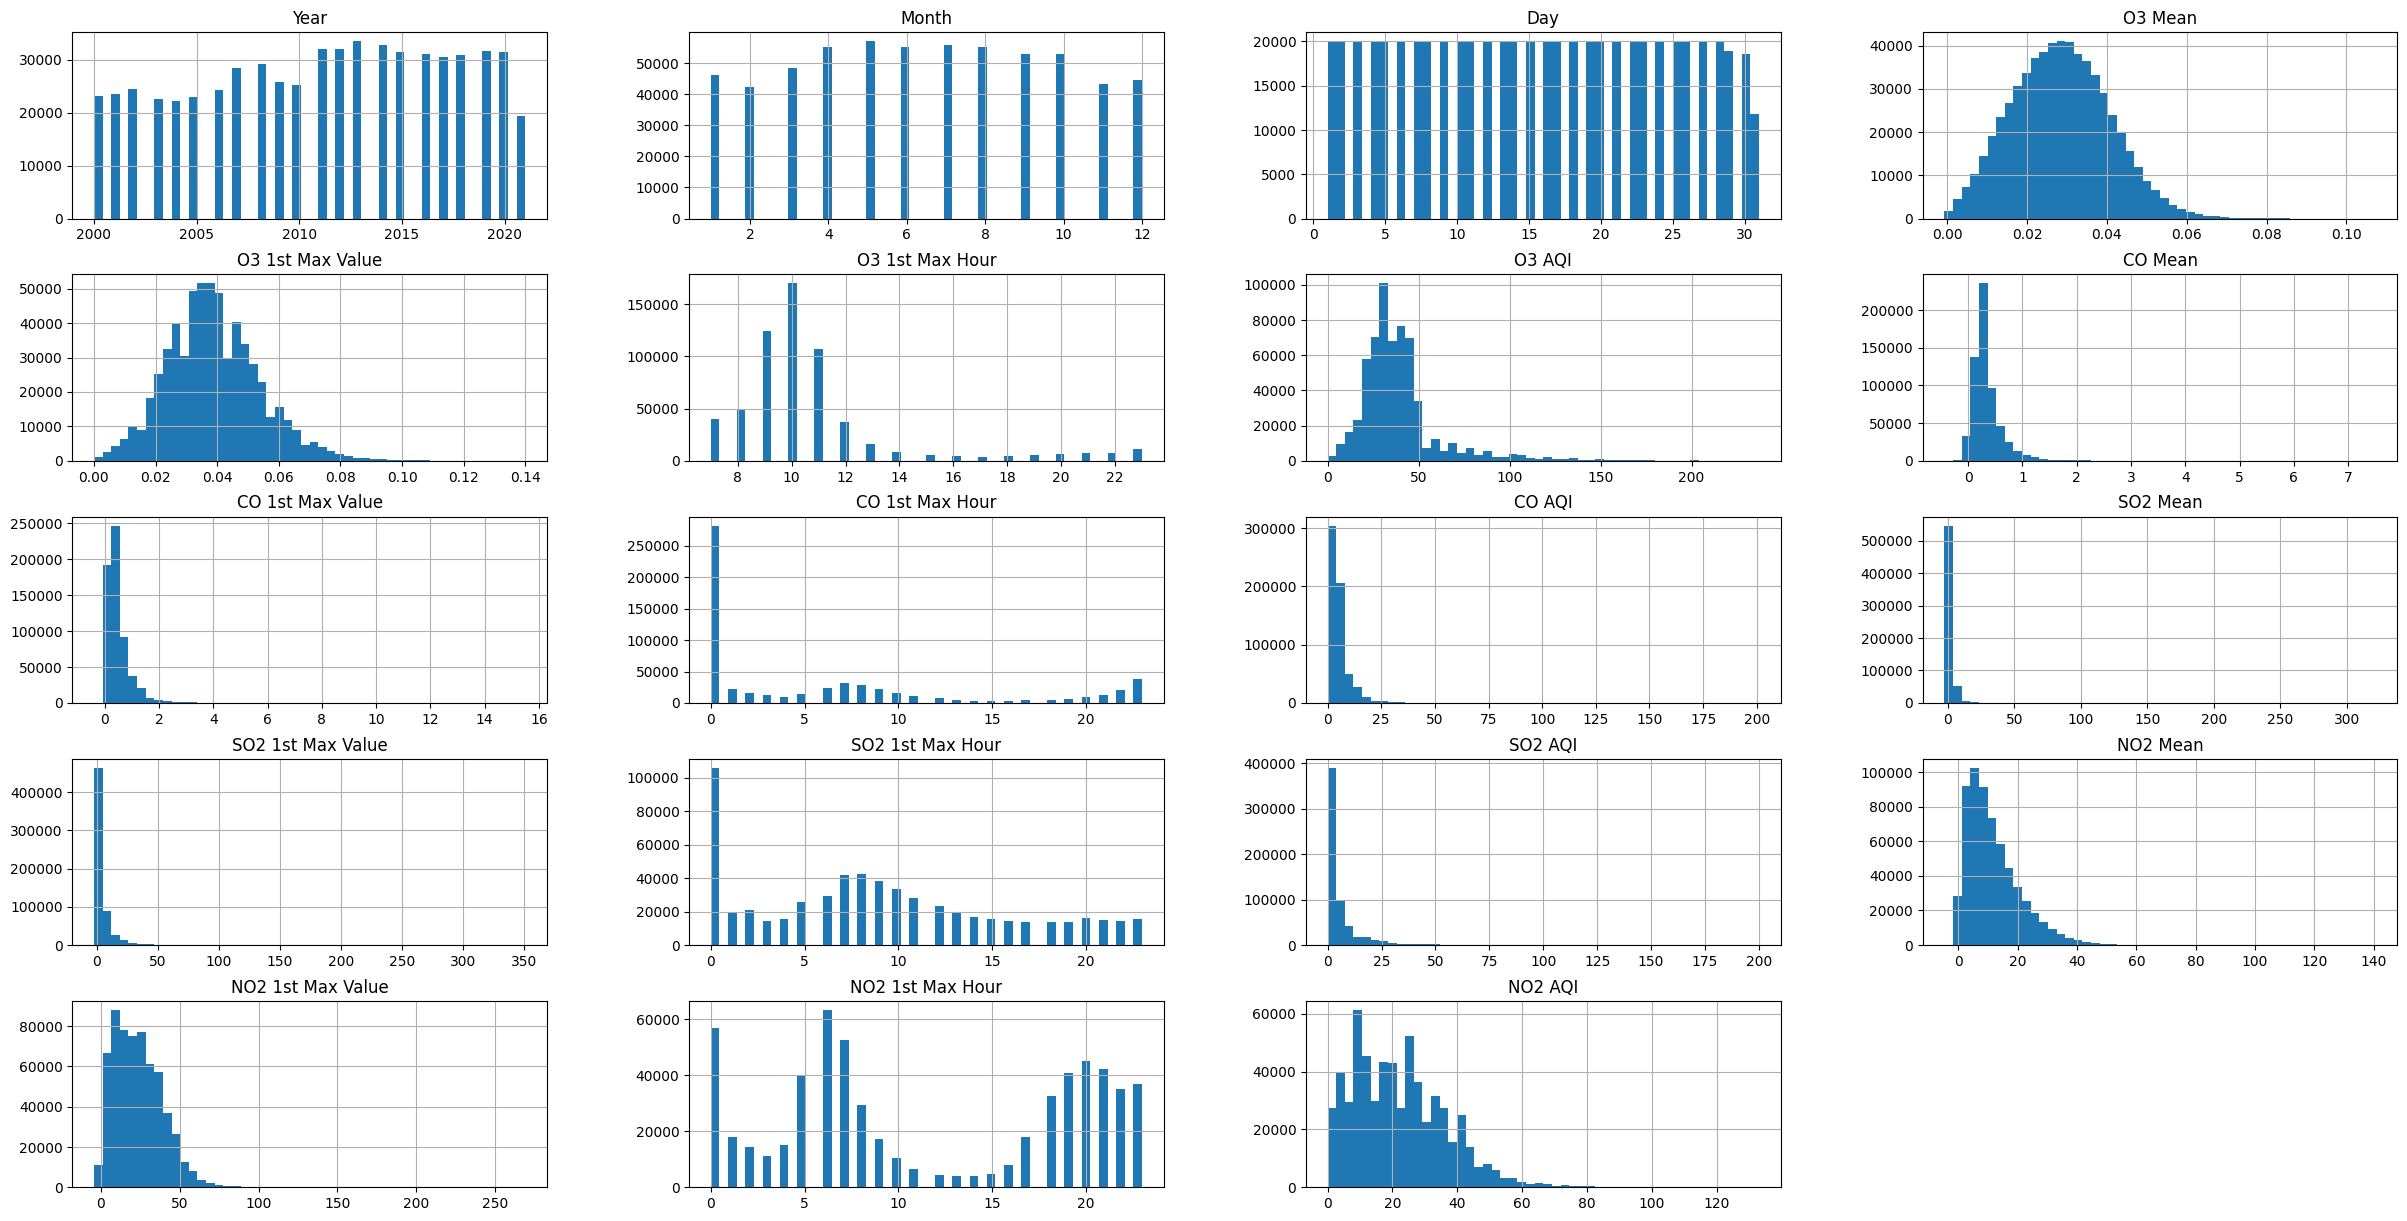

In [16]:
# check phân bố dữ liệu
test_df.hist(bins=50,figsize=(30, 15))
plt.show()

Kiểm tra lại dữ liệu null

In [17]:
# check dữ liệu NaN
missing_data = test_df.isna().sum().reset_index()
missing_data.columns = ["features", "total_missing"]

In [18]:
missing_data

,features,total_missing
0,Date,0
1,Year,0
2,Month,0
3,Day,0
4,Address,0
5,State,0
6,County,0
7,City,0
8,O3 Mean,0
9,O3 1st Max Value,0


Trực quan hóa dữ liệu trước tiền xử lí

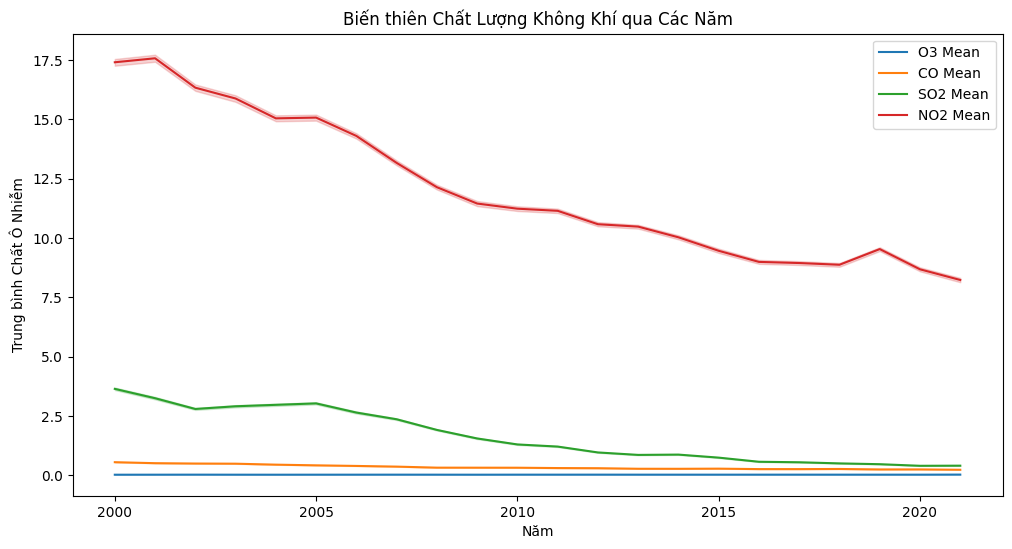

In [19]:
# Biểu đồ Tổng quan về Chất Lượng Không Khí qua Các Năm
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='O3 Mean', data=train_df, label='O3 Mean')
sns.lineplot(x='Year', y='CO Mean', data=train_df, label='CO Mean')
sns.lineplot(x='Year', y='SO2 Mean', data=train_df, label='SO2 Mean')
sns.lineplot(x='Year', y='NO2 Mean', data=train_df, label='NO2 Mean')
plt.title('Biến thiên Chất Lượng Không Khí qua Các Năm')
plt.xlabel('Năm')
plt.ylabel('Trung bình Chất Ô Nhiễm')
plt.legend()
plt.show()

Kết luận:
Các thuộc tính có sự giảm dần qua các năm

Thay đổi rõ rệt và giảm sâu nhất ở NO2

O3 và CO ít có sự biến thiên

<ipython-input-20-9c13c3f3fedd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='O3 Mean', data=train_df, label='O3 Mean', ci=None)
<ipython-input-20-9c13c3f3fedd>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='CO Mean', data=train_df, label='CO Mean', ci=None)
<ipython-input-20-9c13c3f3fedd>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='SO2 Mean', data=train_df, label='SO2 Mean', ci=None)
<ipython-input-20-9c13c3f3fedd>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='NO2 Mean', data=train_df, label='NO2 Mean', ci=None)


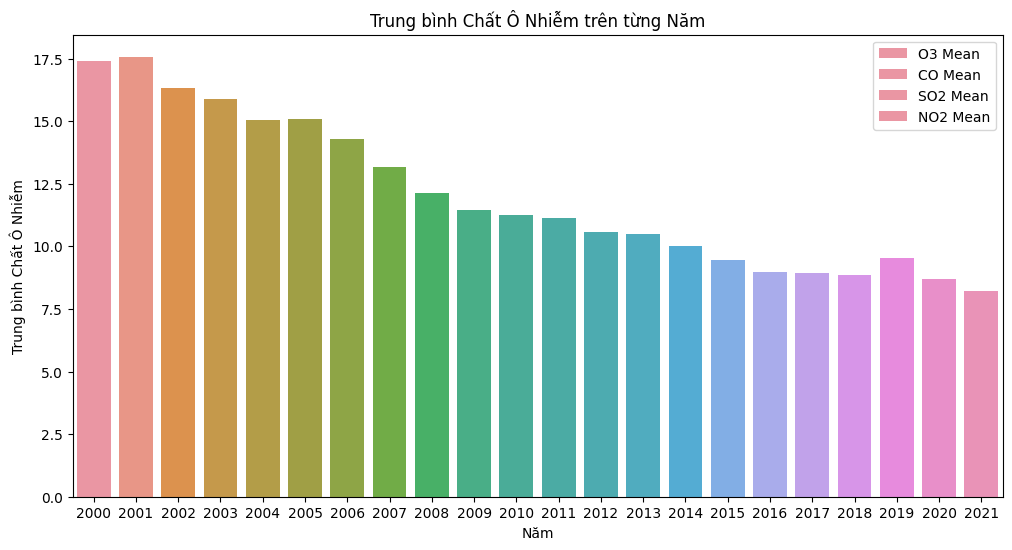

In [20]:
# Biểu đồ đa biểu đồ cột của trung bình các chất ô nhiễm trên từng năm
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='O3 Mean', data=train_df, label='O3 Mean', ci=None)
sns.barplot(x='Year', y='CO Mean', data=train_df, label='CO Mean', ci=None)
sns.barplot(x='Year', y='SO2 Mean', data=train_df, label='SO2 Mean', ci=None)
sns.barplot(x='Year', y='NO2 Mean', data=train_df, label='NO2 Mean', ci=None)
plt.title('Trung bình Chất Ô Nhiễm trên từng Năm')
plt.xlabel('Năm')
plt.ylabel('Trung bình Chất Ô Nhiễm')
plt.legend()
plt.show()

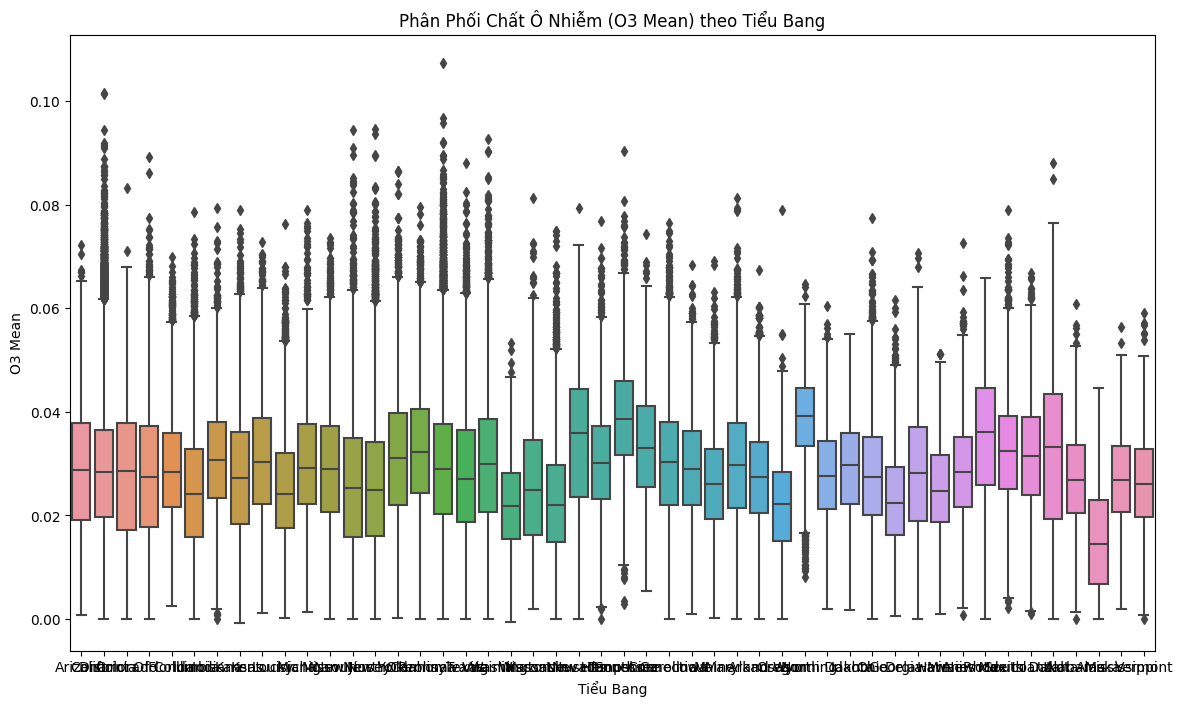

In [21]:
# Phân Phối Chất Lượng Không Khí theo Tiểu Bang
plt.figure(figsize=(14, 8))
sns.boxplot(x='State', y='O3 Mean', data=train_df)
plt.title('Phân Phối Chất Ô Nhiễm (O3 Mean) theo Tiểu Bang')
plt.xlabel('Tiểu Bang')
plt.ylabel('O3 Mean')
plt.show()

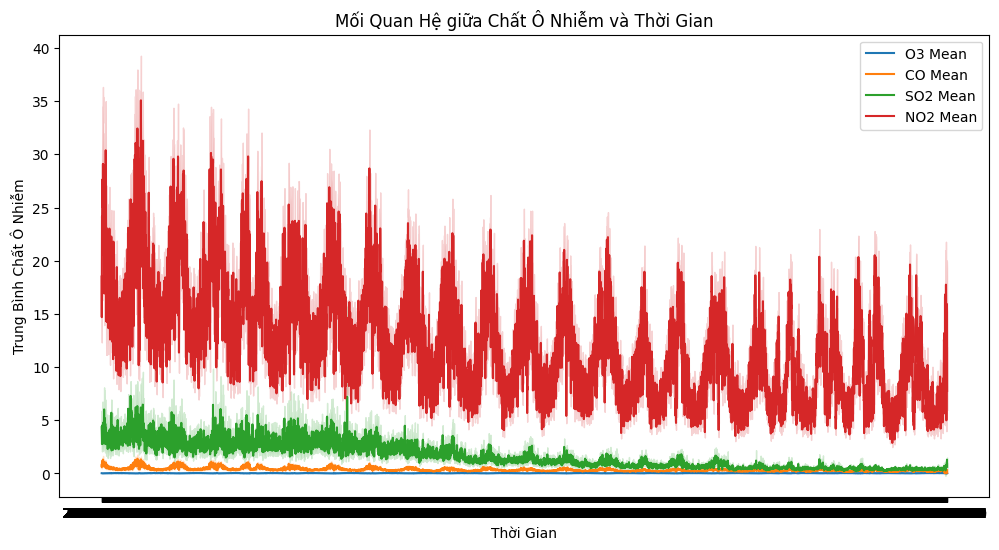

In [22]:
# Biểu Đồ Phụ Thuộc Thời Gian của Chất Ô Nhiễm
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='O3 Mean', data=train_df, label='O3 Mean')
sns.lineplot(x='Date', y='CO Mean', data=train_df, label='CO Mean')
sns.lineplot(x='Date', y='SO2 Mean', data=train_df, label='SO2 Mean')
sns.lineplot(x='Date', y='NO2 Mean', data=train_df, label='NO2 Mean')
plt.title('Mối Quan Hệ giữa Chất Ô Nhiễm và Thời Gian')
plt.xlabel('Thời Gian')
plt.ylabel('Trung Bình Chất Ô Nhiễm')
plt.legend()
plt.show()

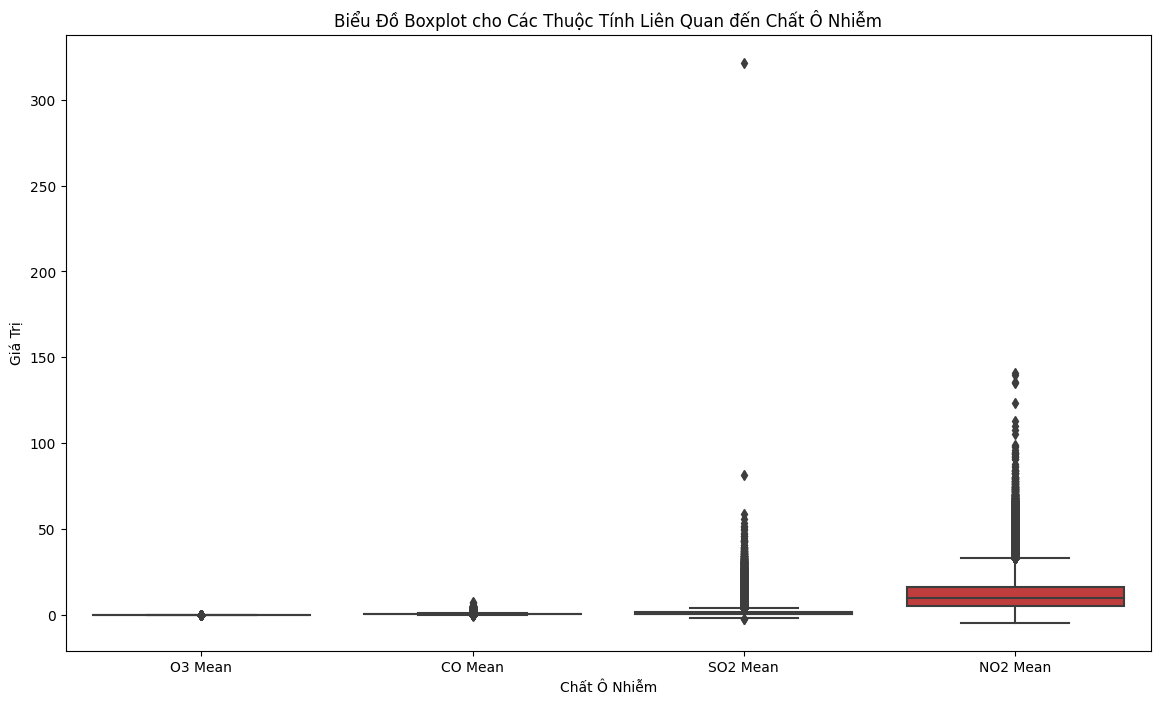

In [23]:
# Biểu Đồ Boxplot cho Các Thuộc Tính Liên Quan đến Chất Ô Nhiễm
numeric_cols = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
plt.figure(figsize=(14, 8))
sns.boxplot(data=train_df[numeric_cols])
plt.title('Biểu Đồ Boxplot cho Các Thuộc Tính Liên Quan đến Chất Ô Nhiễm')
plt.xlabel('Chất Ô Nhiễm')
plt.ylabel('Giá Trị')
plt.show()

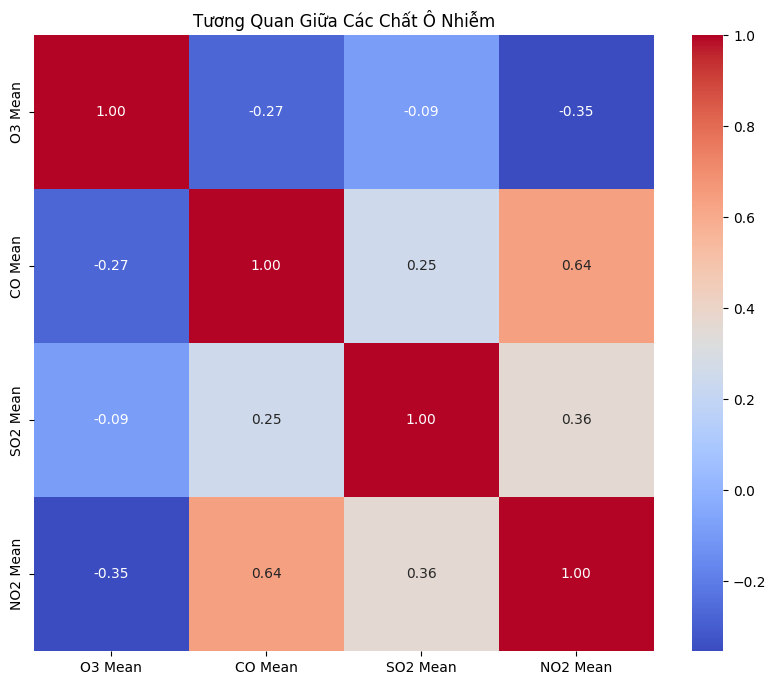

In [24]:
# Tương Quan Giữa Các Chất Ô Nhiễm
corr_matrix = train_df[['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Tương Quan Giữa Các Chất Ô Nhiễm')
plt.show()

Tiền xử lí dữ liệu

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']] = scaler.fit_transform(train_df[['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']])


 Loại bỏ Cột Không Cần Thiết:

In [26]:
# Loại bỏ cột 'Address' và 'Country'
train_df = train_df.drop(['Address', 'County'], axis=1)

In [27]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [28]:
# Tính giá trị nhỏ nhất và lớn nhất của cột 'Date'
min_date = train_df['Date'].min()
max_date = train_df['Date'].max()

print(f"Min Date: {min_date}")
print(f"Max Date: {max_date}")

Min Date: 2000-01-01 00:00:00
Max Date: 2021-10-31 00:00:00


In [29]:
# Đếm số lượng trạng thái và thành phố trong Pandas DataFrame
num_states = train_df['State'].nunique()
num_cities = train_df['City'].nunique()

print(f"Number of States: {num_states}")
print(f"Number of Cities: {num_cities}")

Number of States: 48
Number of Cities: 148


In [30]:
state_counts = train_df['State'].value_counts()

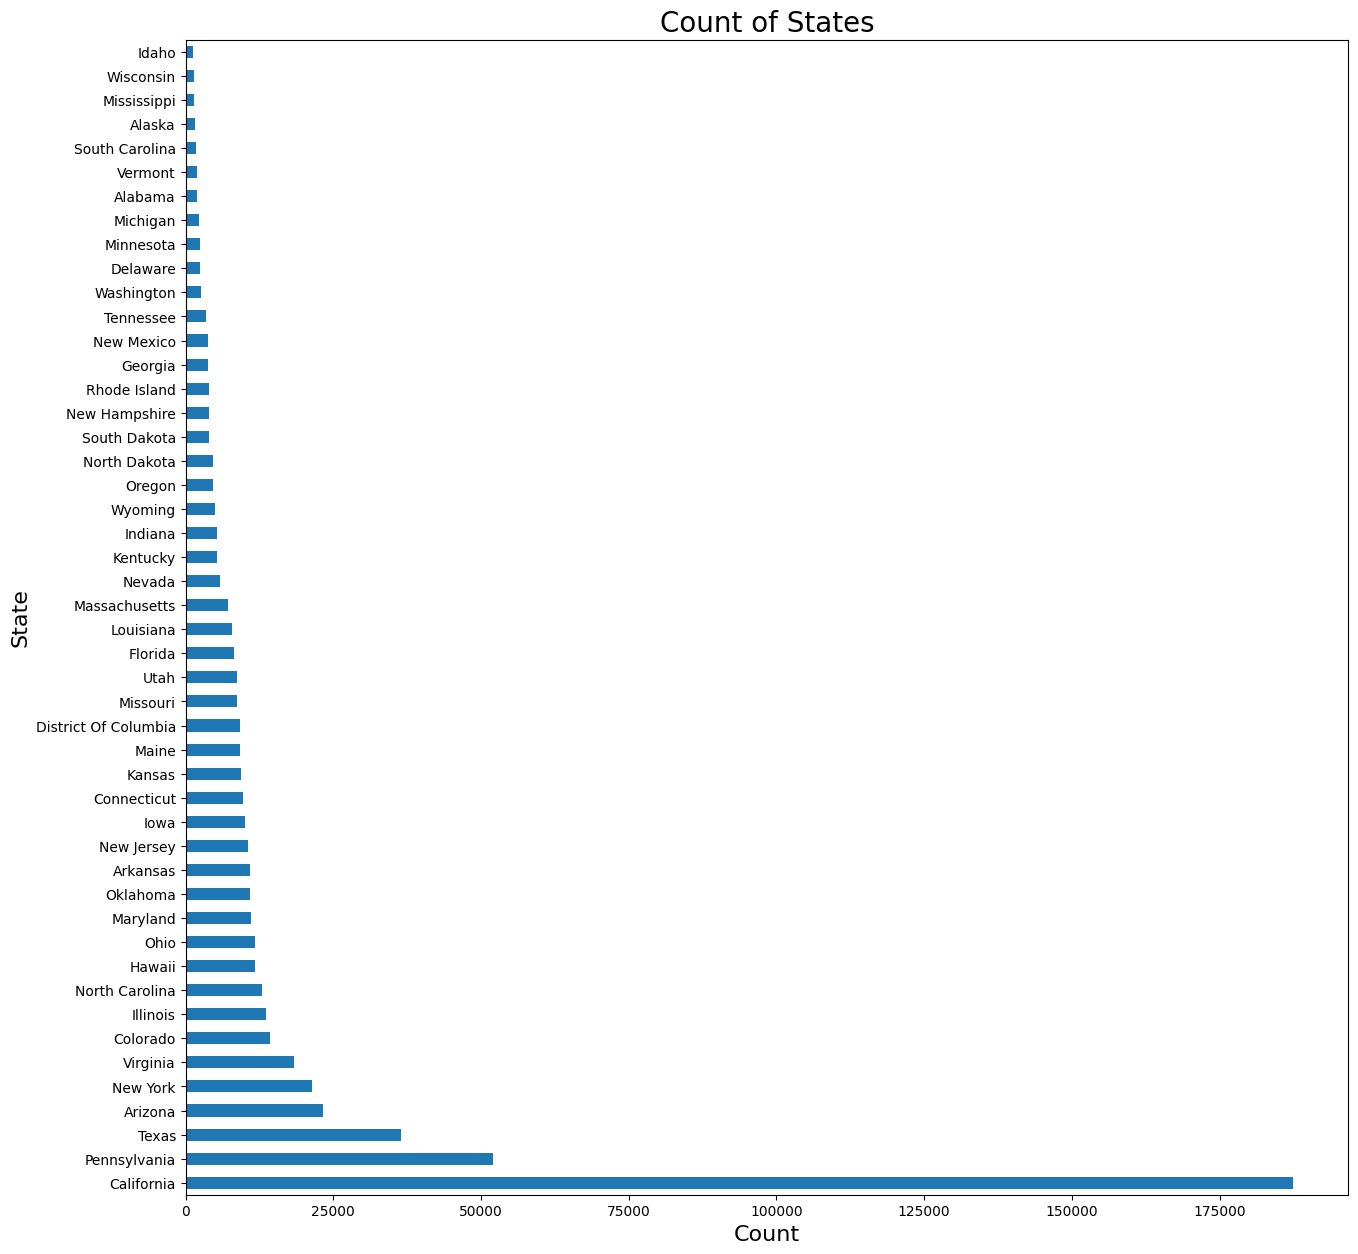

In [31]:
# Vẽ biểu đồ
ax = state_counts.plot(kind='barh', y="Tên_Cột", figsize=(15, 15))

ax.set_ylabel("State", fontsize=16)
ax.set_xlabel("Count", fontsize=16)
ax.set_title('Count of States', fontsize=20)

# Hiển thị biểu đồ
plt.show()

In [32]:
# Tạo biến tổng hợp 'Average_AQI' từ các chỉ số AQI
train_df['Average_AQI'] = train_df[['O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI']].mean(axis=1)

In [33]:
# Lấy ra những cột dạng numeric trong data
numeric = test_df.select_dtypes(exclude='object')

In [34]:
# Lấy ra những cột cần thiết
cols_to_check = [col for col in numeric.columns if col not in ['Date']]
cols_to_check

['Year',
 'Month',
 'Day',
 'O3 Mean',
 'O3 1st Max Value',
 'O3 1st Max Hour',
 'O3 AQI',
 'CO Mean',
 'CO 1st Max Value',
 'CO 1st Max Hour',
 'CO AQI',
 'SO2 Mean',
 'SO2 1st Max Value',
 'SO2 1st Max Hour',
 'SO2 AQI',
 'NO2 Mean',
 'NO2 1st Max Value',
 'NO2 1st Max Hour',
 'NO2 AQI']

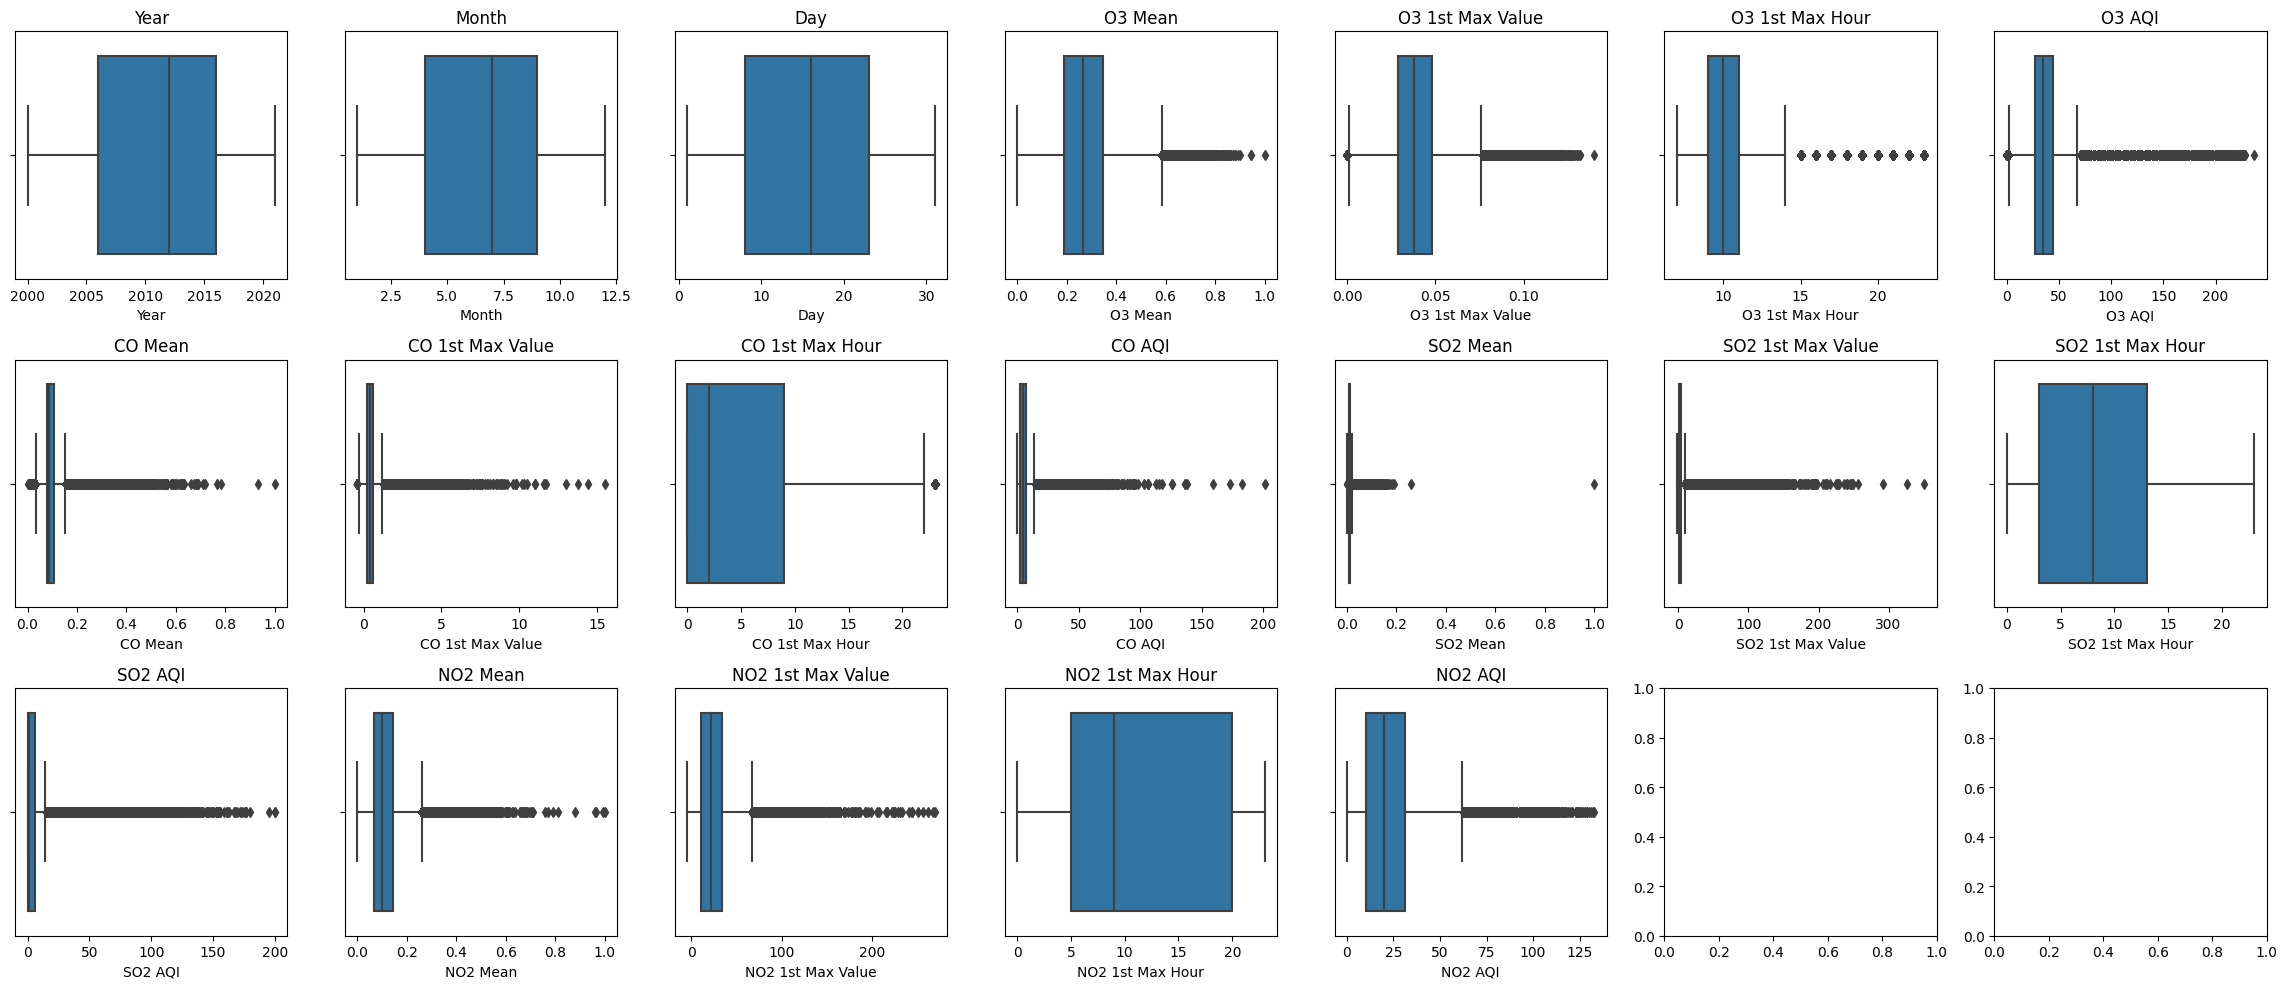

In [35]:
# visualize outliers sử dụng boxplot
fig, ax = plt.subplots(3, 7, figsize=(23, 10))  # Điều chỉnh kích thước subplot để vừa với số lượng biến
ax = ax.flatten()

for i, c in enumerate(cols_to_check):
    sns.boxplot(x=train_df[c], ax=ax[i])
    ax[i].set_title(c)  # Thêm tiêu đề cho mỗi boxplot

fig.tight_layout()
plt.show()

In [36]:
# Thông tin về số lượng ngoại lệ và phần trăm số lượng ngoại lệ cụ thể
outlier_info = {}

for col in cols_to_check:
    # Tính phân vị
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Xác định ngoại lệ
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]

    # Lưu thông tin ngoại lệ
    outlier_info[col] = {
        'count': outliers.shape[0],
        'percentage': outliers.shape[0] / train_df.shape[0] * 100
    }

# In thông tin về số lượng ngoại lệ và phần trăm số lượng ngoại lệ
for col, info in outlier_info.items():
    print(f"Thuộc tính: {col}")
    print(f"Số lượng ngoại lệ: {info['count']}")
    print(f"Phần trăm số lượng ngoại lệ: {info['percentage']:.2f}%\n")

Thuộc tính: Year
Số lượng ngoại lệ: 0
Phần trăm số lượng ngoại lệ: 0.00%

Thuộc tính: Month
Số lượng ngoại lệ: 0
Phần trăm số lượng ngoại lệ: 0.00%

Thuộc tính: Day
Số lượng ngoại lệ: 0
Phần trăm số lượng ngoại lệ: 0.00%

Thuộc tính: O3 Mean
Số lượng ngoại lệ: 2836
Phần trăm số lượng ngoại lệ: 0.47%

Thuộc tính: O3 1st Max Value
Số lượng ngoại lệ: 8985
Phần trăm số lượng ngoại lệ: 1.48%

Thuộc tính: O3 1st Max Hour
Số lượng ngoại lệ: 56457
Phần trăm số lượng ngoại lệ: 9.28%

Thuộc tính: O3 AQI
Số lượng ngoại lệ: 49801
Phần trăm số lượng ngoại lệ: 8.18%

Thuộc tính: CO Mean
Số lượng ngoại lệ: 39708
Phần trăm số lượng ngoại lệ: 6.52%

Thuộc tính: CO 1st Max Value
Số lượng ngoại lệ: 32124
Phần trăm số lượng ngoại lệ: 5.28%

Thuộc tính: CO 1st Max Hour
Số lượng ngoại lệ: 38150
Phần trăm số lượng ngoại lệ: 6.27%

Thuộc tính: CO AQI
Số lượng ngoại lệ: 32120
Phần trăm số lượng ngoại lệ: 5.28%

Thuộc tính: SO2 Mean
Số lượng ngoại lệ: 58163
Phần trăm số lượng ngoại lệ: 9.56%

Thuộc tính: SO2 1s

In [39]:
def winsorize_column(data, column, lower_percentile=2, upper_percentile=98):

    lower_limit = np.percentile(data[column], lower_percentile)
    upper_limit = np.percentile(data[column], upper_percentile)

    data[column] = np.where(data[column] < lower_limit, lower_limit, data[column])
    data[column] = np.where(data[column] > upper_limit, upper_limit, data[column])

    return data

# Áp dụng Winsorization cho từng thuộc tính
cols_to_winsorize = ['O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
                     'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
                     'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
                     'NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI']

for col in cols_to_winsorize:
    data = winsorize_column(data, col)

# Kiểm tra lại kết quả
data.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Average_AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.269458,0.038823,10.754388,38.667379,0.096529,0.463203,5.971042,5.212070,0.012197,3.881331,8.851891,5.167717,0.111744,23.387852,11.606845,21.896399,18.045713
std,6.122558,3.310633,8.806949,0.109665,0.014357,3.239750,19.989088,0.030680,0.372073,7.739380,4.286399,0.006208,5.818234,6.774720,8.461557,0.058983,14.589397,7.881014,13.819971,8.429109
min,2000.000000,1.000000,1.000000,0.056617,0.011000,7.000000,10.000000,0.055060,0.000000,0.000000,0.000000,0.007680,0.000000,0.000000,0.000000,0.035087,1.200000,0.000000,1.000000,0.250000
25%,2006.000000,4.000000,8.000000,0.188351,0.029000,9.000000,27.000000,0.077609,0.200000,0.000000,2.000000,0.008317,0.600000,3.000000,0.000000,0.066131,11.200000,5.000000,10.000000,12.250000
50%,2012.000000,7.000000,16.000000,0.267826,0.038000,10.000000,35.000000,0.088096,0.400000,2.000000,5.000000,0.009795,1.700000,8.000000,1.000000,0.097542,21.800000,9.000000,20.000000,16.250000
75%,2016.000000,9.000000,23.000000,0.346764,0.048000,11.000000,44.000000,0.108023,0.600000,9.000000,7.000000,0.013208,4.000000,13.000000,6.000000,0.144092,33.700000,20.000000,31.000000,21.500000
max,2021.000000,12.000000,31.000000,0.511156,0.074000,22.000000,112.000000,0.200315,1.800000,23.000000,20.000000,0.036405,28.000000,23.000000,40.000000,0.279663,59.000000,23.000000,56.000000,106.250000


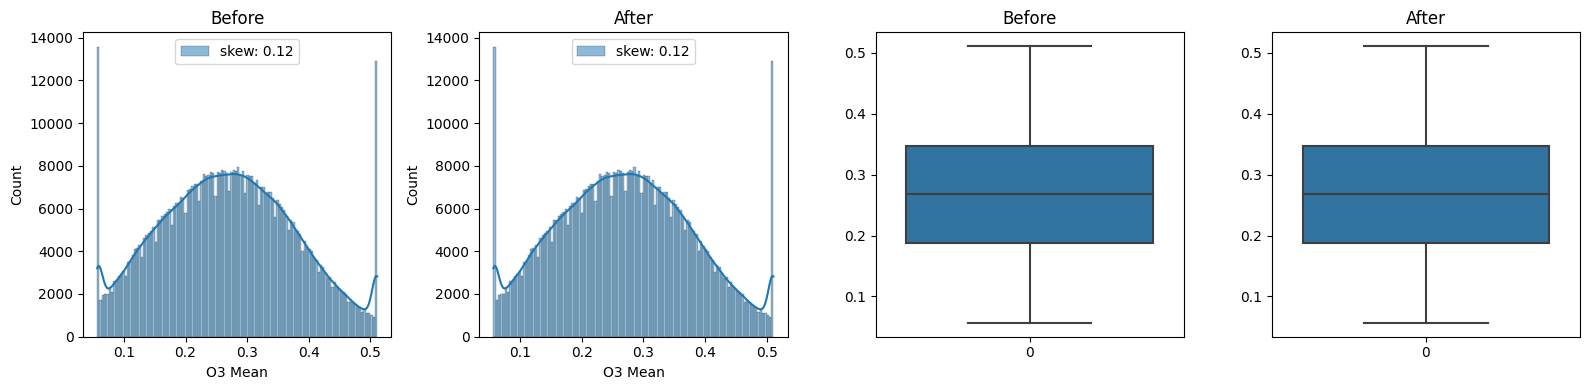

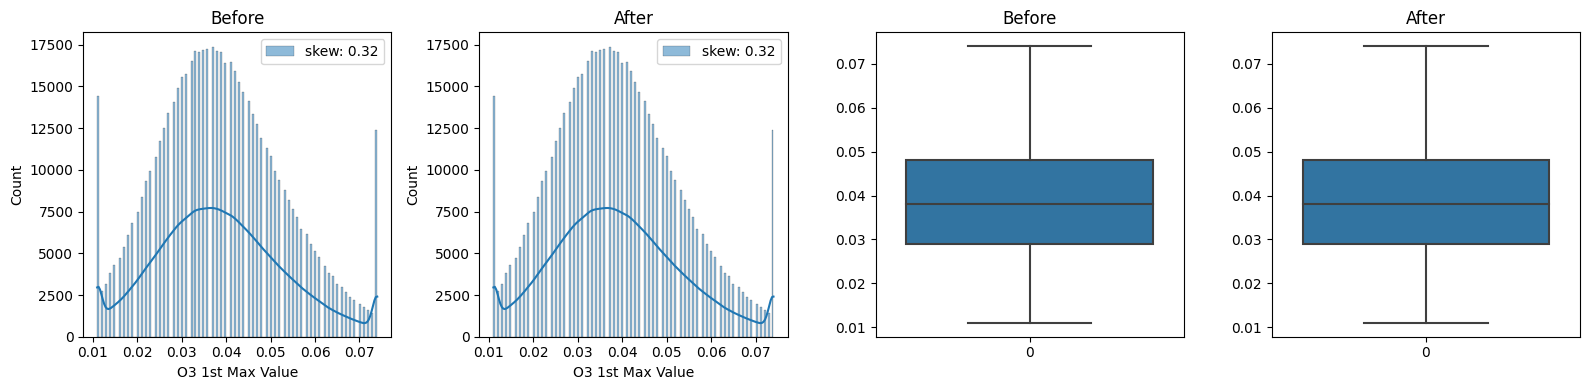

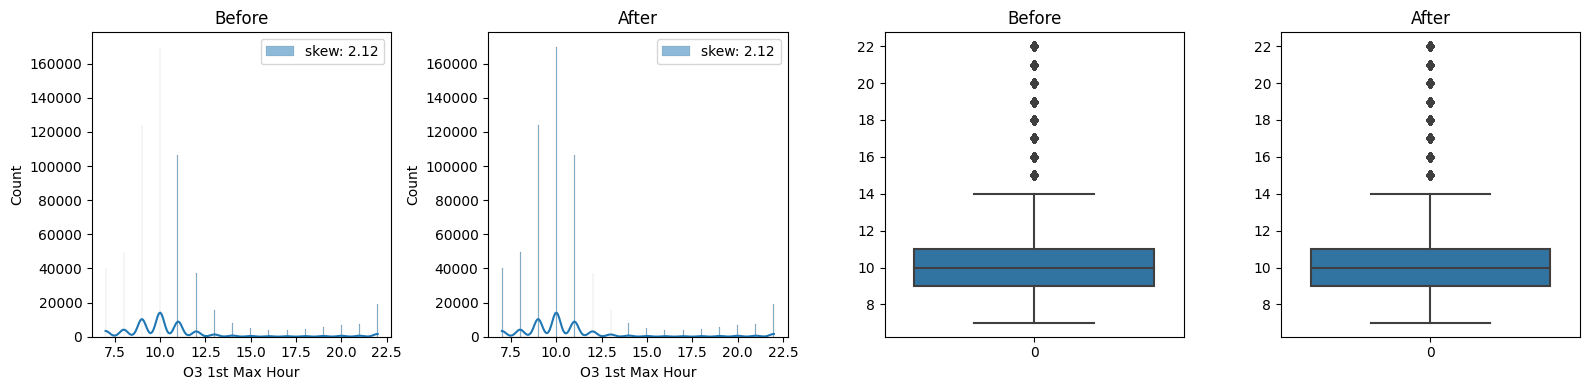

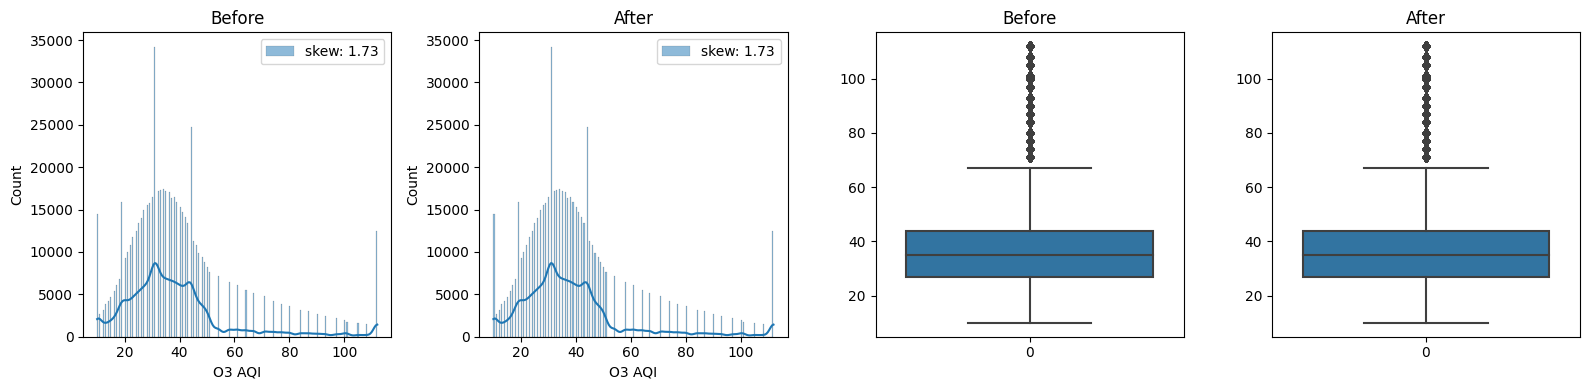

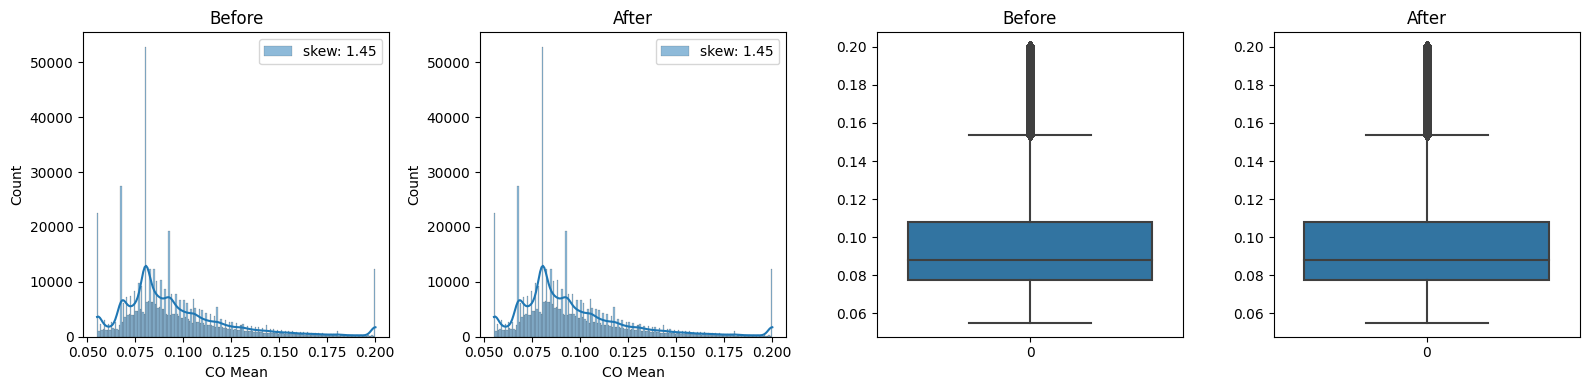

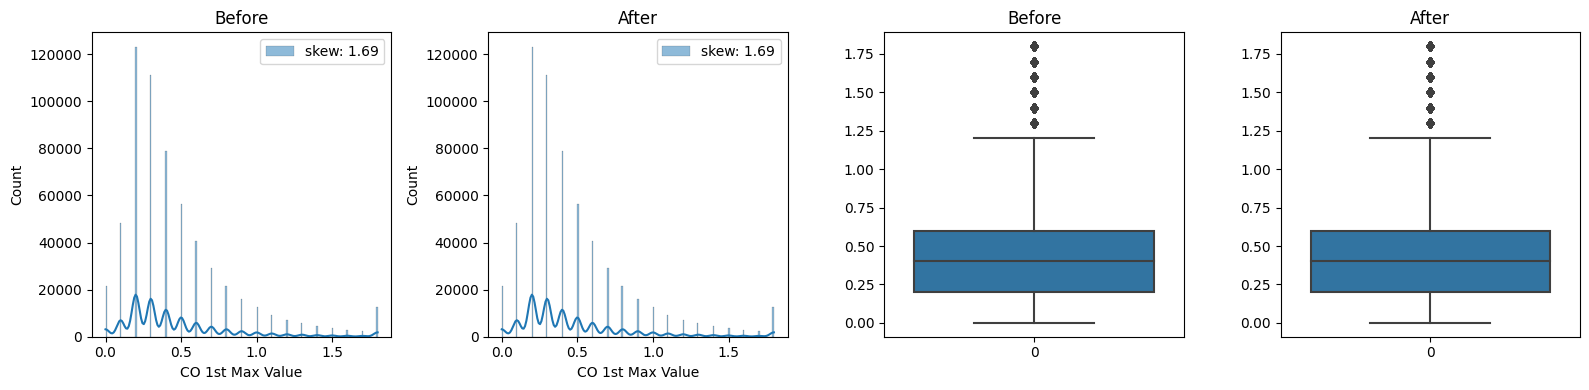

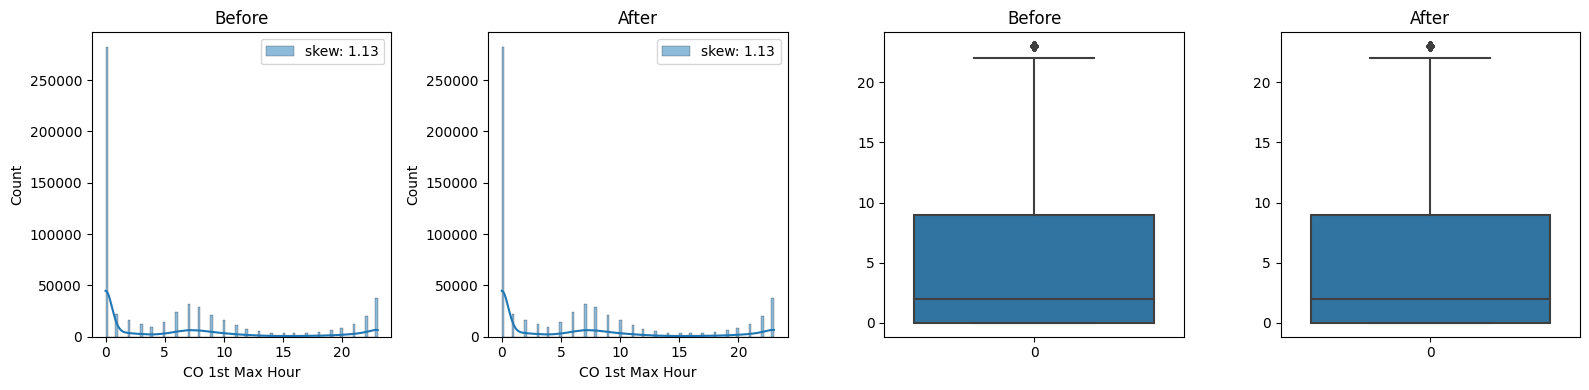

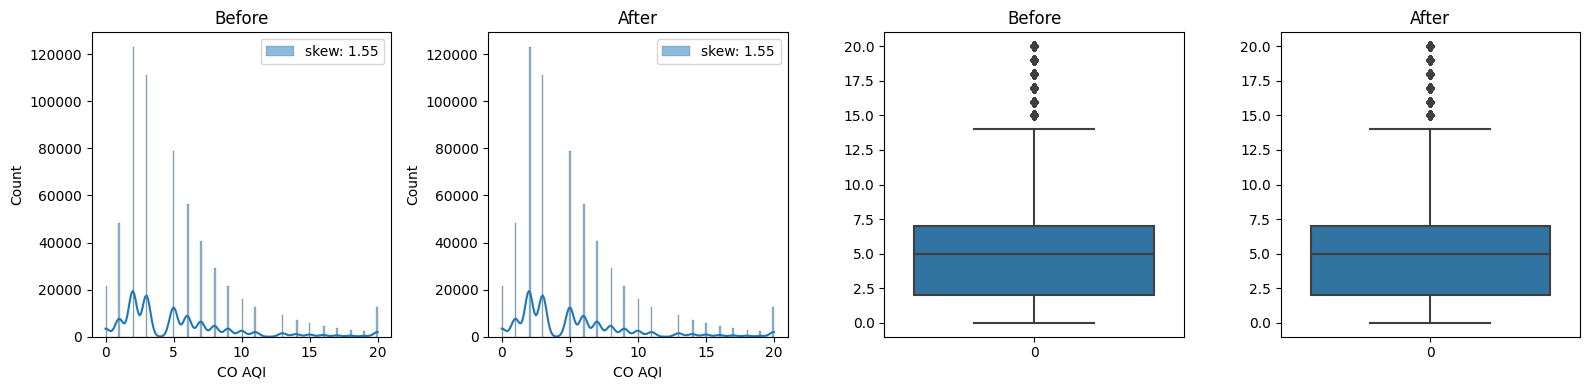

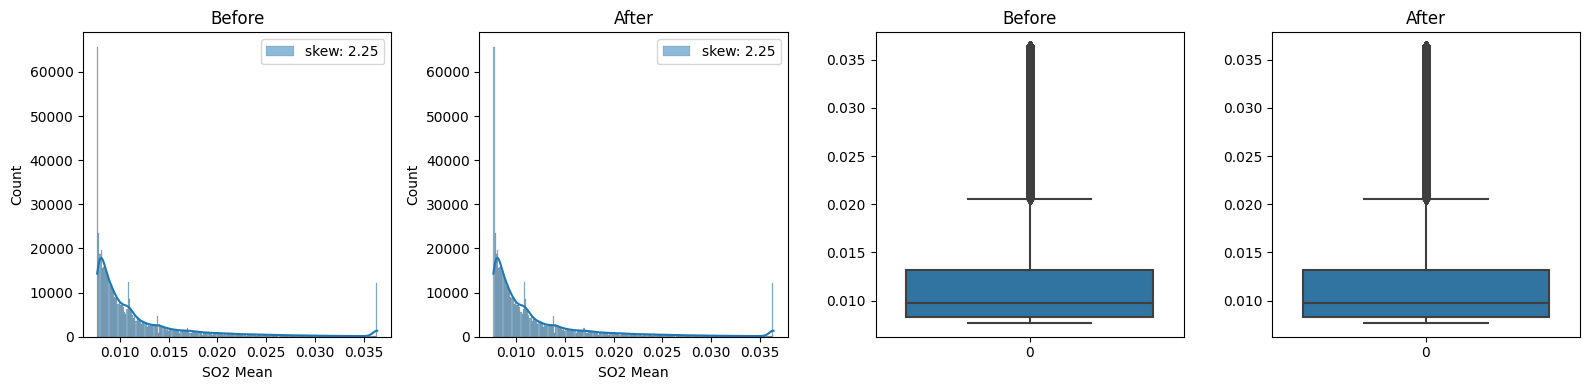

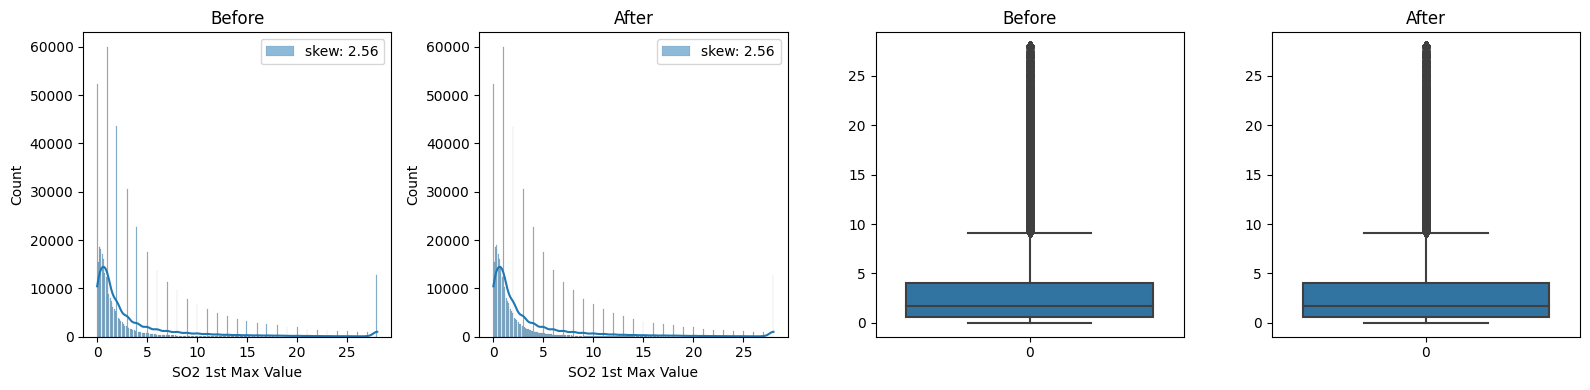

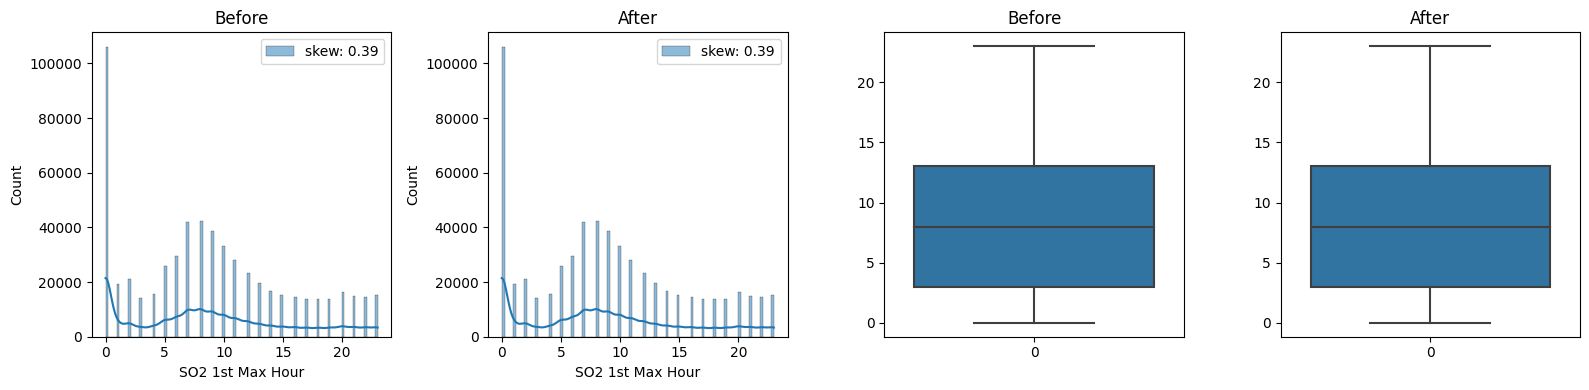

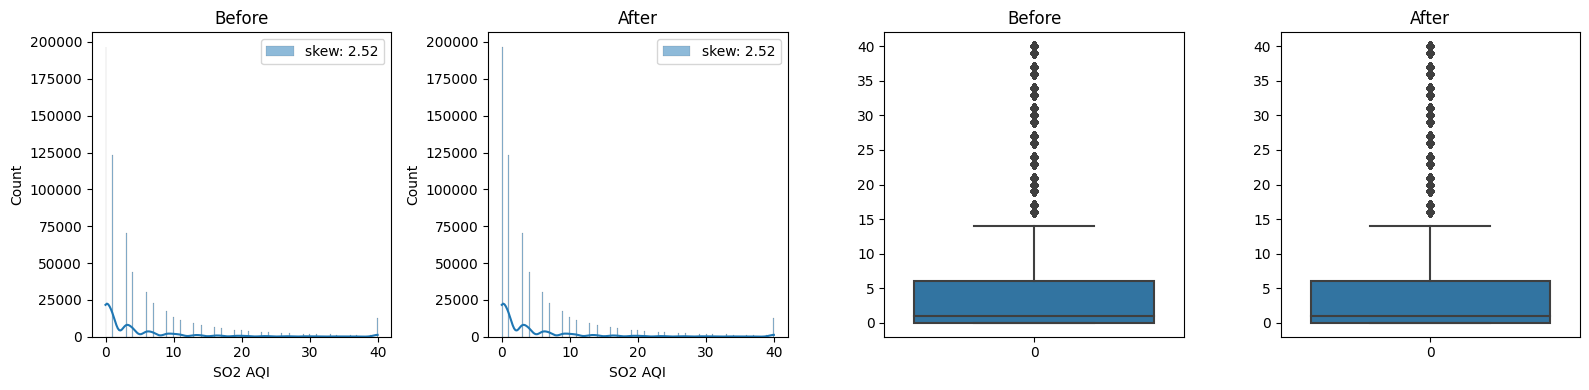

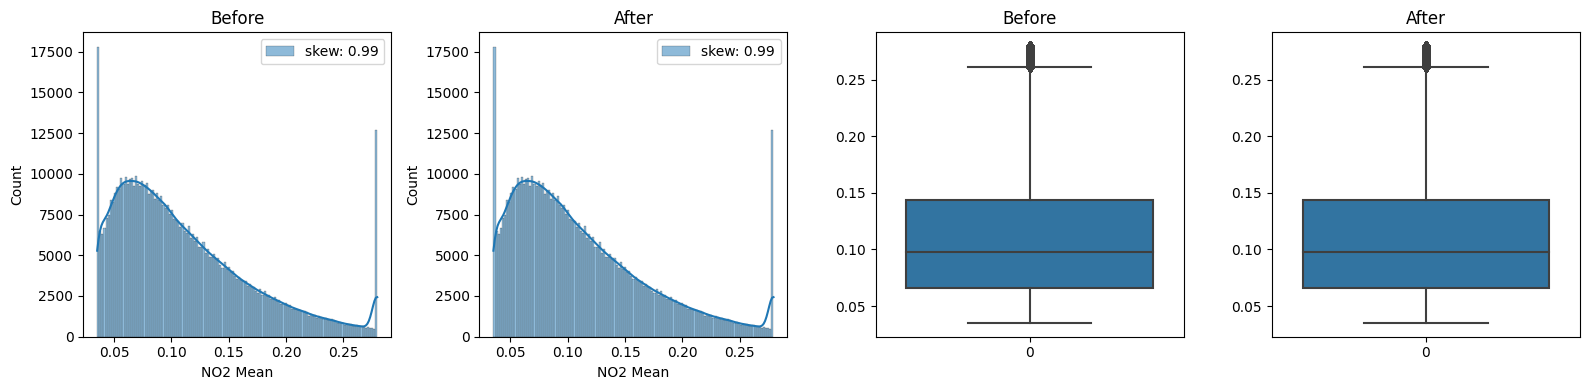

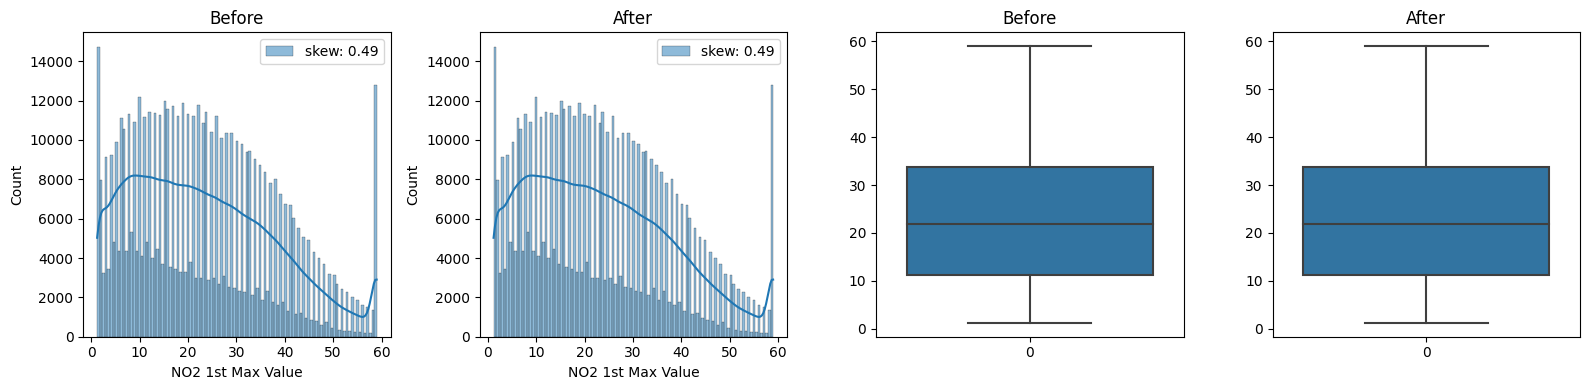

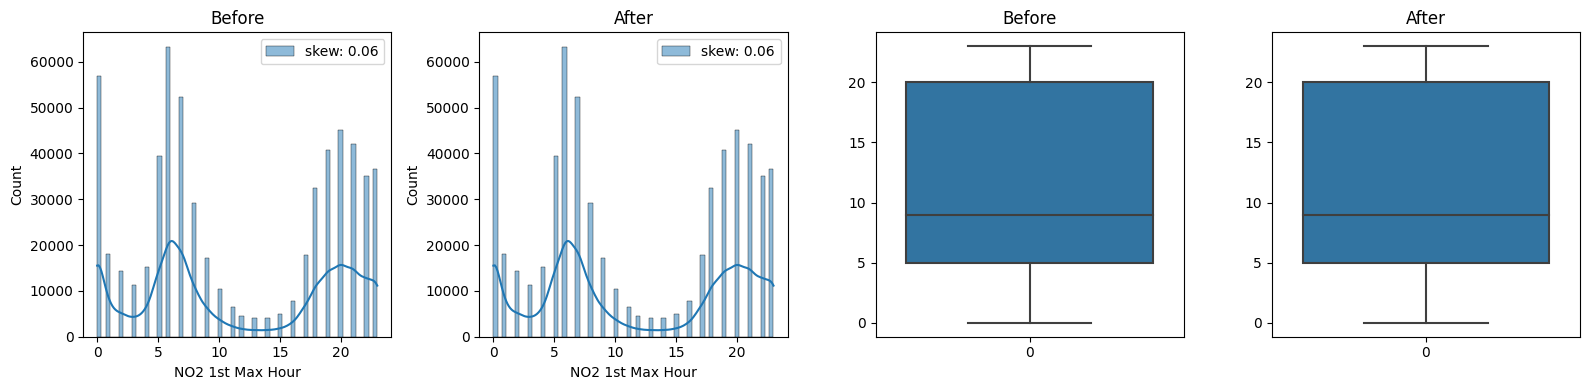

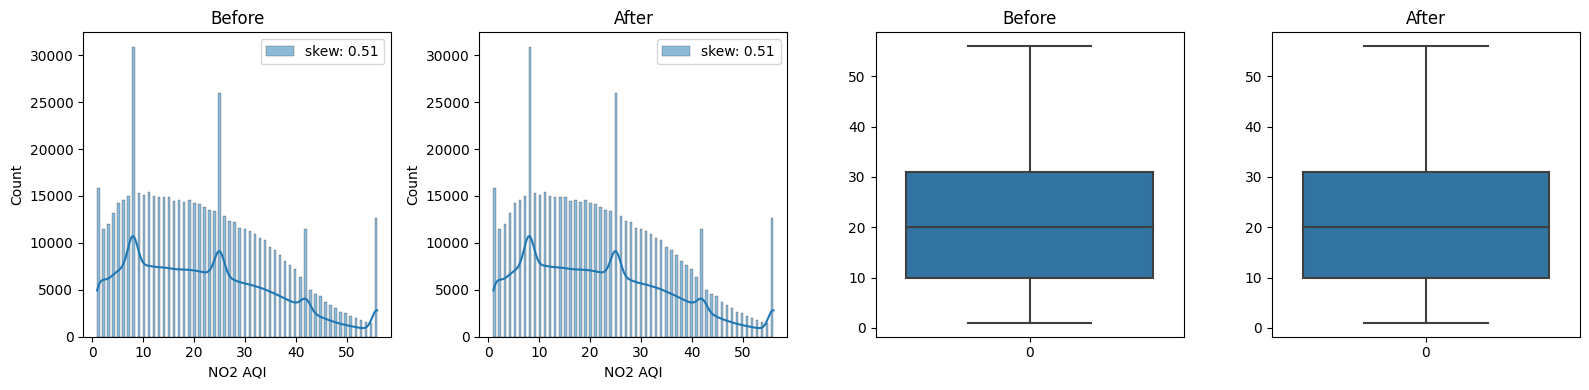

In [41]:
# Khởi tạo DataFrame mới để giữ lại dữ liệu gốc
df_win = train_df.copy()

# Áp dụng Winsorization cho từng thuộc tính
for col in cols_to_winsorize:
    df_win = winsorize_column(df_win, col)

# Kiểm tra kết quả
for col in cols_to_winsorize:
    plt.figure(figsize=(16, 4))

    # Phân phối trước và sau xử lý ngoại lệ
    # Thay thế distplot bằng histplot
    plt.subplot(141)
    sns.histplot(train_df[col], kde=True, label="skew: " + str(np.round(train_df[col].skew(), 2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.histplot(df_win[col], kde=True, label="skew: " + str(np.round(df_win[col].skew(), 2)))
    plt.title('After')
    plt.legend()


    # Biểu đồ boxplot trước và sau xử lý ngoại lệ
    plt.subplot(143)
    sns.boxplot(train_df[col])
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(df_win[col])
    plt.title('After')

    plt.tight_layout()
    plt.show()

 Chạy hàm xử lý ngoại lệ và tiến hành in đồ thị để so sánh dữ liệu trước khi loại bỏ ngoại lệ và sau khi loại bỏ ngoại lệ. Trong đó hàm skew được sử dụng để tính toán độ lệch của dữ liệu hiện tại.

▪ Nếu kết quả trả về là 0: đồ thị đối xứng và đạt phân phối chuẩn.

▪ Nếu kết quả trả về số âm: đồ thị không đối xứng, lệch về phía bên trái.

▪ Nếu kết quả trả về dương: đồ thị không đối xứng và lệch về phía bên phải.

-Nhận xét:

• Có một vài thuộc tính không trả về giá trị skew = 0 nên ta sẽ tiến hành chuẩn hóa dữ liệu các cột đó ở những bước sau.

• Các cột đó là:.

Data Cleaning

In [42]:
train_df.dtypes

Date                 datetime64[ns]
Year                          int64
Month                         int64
Day                           int64
State                        object
City                         object
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour             float64
O3 AQI                      float64
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour             float64
CO AQI                      float64
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour            float64
SO2 AQI                     float64
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour            float64
NO2 AQI                     float64
Average_AQI                 float64
dtype: object

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


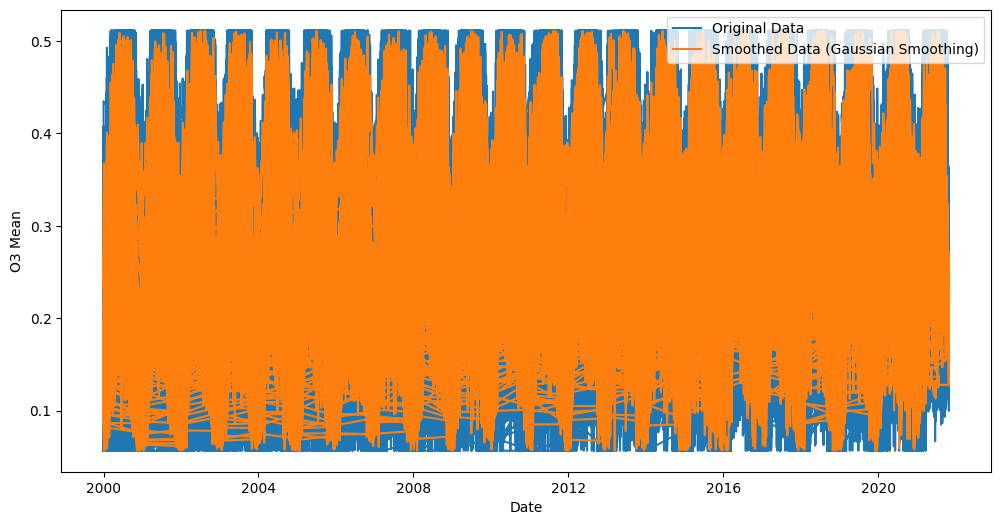

In [43]:
from scipy.ndimage import gaussian_filter1d

# Áp dụng Gaussian Smoothing cho 'O3 Mean'
sigma = 2  # Điều chỉnh độ mịn của đường biểu đồ
train_df['O3 Mean Smoothed'] = gaussian_filter1d(train_df['O3 Mean'], sigma=sigma)

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'], train_df['O3 Mean'], label='Original Data')
plt.plot(train_df['Date'], train_df['O3 Mean Smoothed'], label=f'Smoothed Data (Gaussian Smoothing)')
plt.xlabel('Date')
plt.ylabel('O3 Mean')
plt.legend()
plt.show()

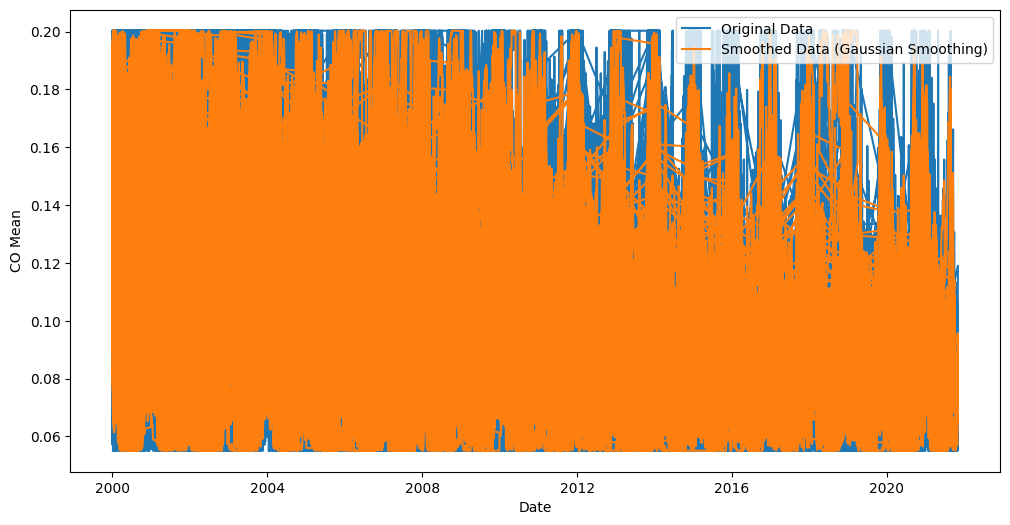

In [44]:
from scipy.ndimage import gaussian_filter1d

# Áp dụng Gaussian Smoothing cho 'CO Mean'
sigma = 2  # Điều chỉnh độ mịn của đường biểu đồ
train_df['CO Mean Smoothed'] = gaussian_filter1d(train_df['CO Mean'], sigma=sigma)

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'], train_df['CO Mean'], label='Original Data')
plt.plot(train_df['Date'], train_df['CO Mean Smoothed'], label=f'Smoothed Data (Gaussian Smoothing)')
plt.xlabel('Date')
plt.ylabel('CO Mean')
plt.legend()
plt.show()

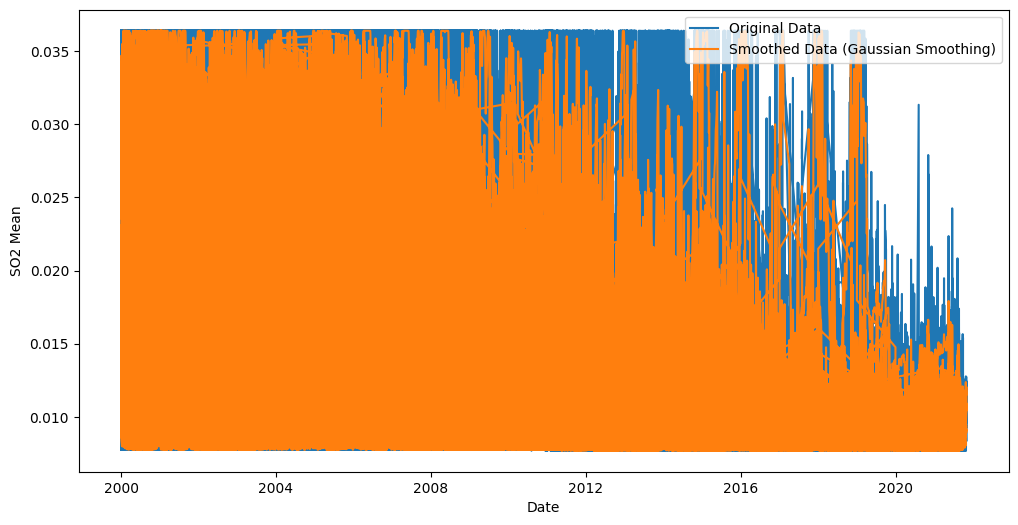

In [45]:
from scipy.ndimage import gaussian_filter1d

# Áp dụng Gaussian Smoothing cho 'SO2 Mean'
sigma = 2  # Điều chỉnh độ mịn của đường biểu đồ
train_df['SO2 Mean Smoothed'] = gaussian_filter1d(train_df['SO2 Mean'], sigma=sigma)

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'], train_df['SO2 Mean'], label='Original Data')
plt.plot(train_df['Date'], train_df['SO2 Mean Smoothed'], label=f'Smoothed Data (Gaussian Smoothing)')
plt.xlabel('Date')
plt.ylabel('SO2 Mean')
plt.legend()
plt.show()

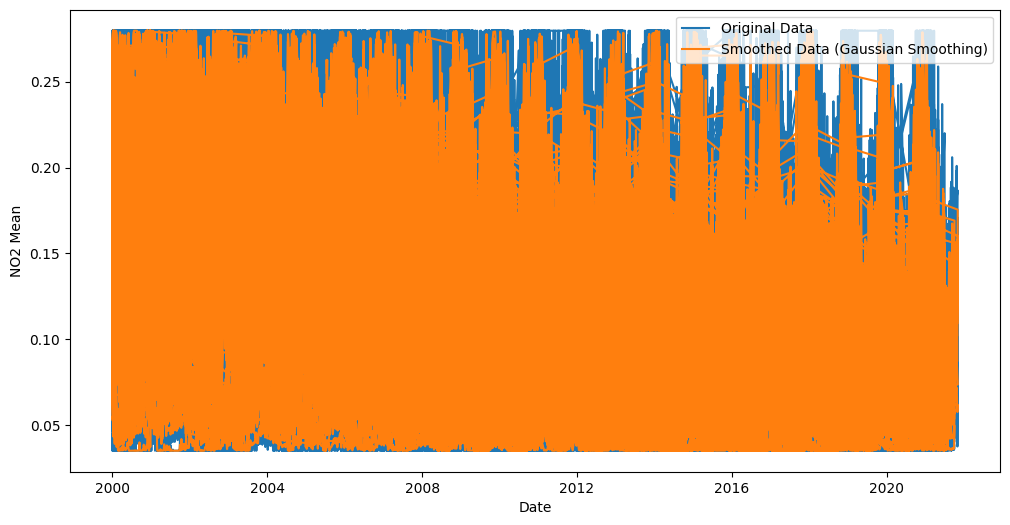

In [46]:
from scipy.ndimage import gaussian_filter1d

# Áp dụng Gaussian Smoothing cho 'NO2 Mean'
sigma = 2  # Điều chỉnh độ mịn của đường biểu đồ
train_df['NO2 Mean Smoothed'] = gaussian_filter1d(train_df['NO2 Mean'], sigma=sigma)

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'], train_df['NO2 Mean'], label='Original Data')
plt.plot(train_df['Date'], train_df['NO2 Mean Smoothed'], label=f'Smoothed Data (Gaussian Smoothing)')
plt.xlabel('Date')
plt.ylabel('NO2 Mean')
plt.legend()
plt.show()

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               608699 non-null  datetime64[ns]
 1   Year               608699 non-null  int64         
 2   Month              608699 non-null  int64         
 3   Day                608699 non-null  int64         
 4   State              608699 non-null  object        
 5   City               608699 non-null  object        
 6   O3 Mean            608699 non-null  float64       
 7   O3 1st Max Value   608699 non-null  float64       
 8   O3 1st Max Hour    608699 non-null  float64       
 9   O3 AQI             608699 non-null  float64       
 10  CO Mean            608699 non-null  float64       
 11  CO 1st Max Value   608699 non-null  float64       
 12  CO 1st Max Hour    608699 non-null  float64       
 13  CO AQI             608699 non-null  float64 

In [48]:
# Kiểm tra dữ liệu lặp lại
duplicate_rows = train_df[train_df.duplicated()]
# In ra các dòng lặp lại
print("Dữ liệu lặp lại:")
print(duplicate_rows)

# Xử lý dữ liệu lặp lại bằng cách loại bỏ
df_no_duplicates = train_df.drop_duplicates()

# In ra số dòng sau khi loại bỏ
print("\nSố dòng sau khi loại bỏ dữ liệu lặp lại:", len(df_no_duplicates))

Dữ liệu lặp lại:
Empty DataFrame
Columns: [Date, Year, Month, Day, State, City, O3 Mean, O3 1st Max Value, O3 1st Max Hour, O3 AQI, CO Mean, CO 1st Max Value, CO 1st Max Hour, CO AQI, SO2 Mean, SO2 1st Max Value, SO2 1st Max Hour, SO2 AQI, NO2 Mean, NO2 1st Max Value, NO2 1st Max Hour, NO2 AQI, Average_AQI, O3 Mean Smoothed, CO Mean Smoothed, SO2 Mean Smoothed, NO2 Mean Smoothed]
Index: []

[0 rows x 27 columns]

Số dòng sau khi loại bỏ dữ liệu lặp lại: 608699


In [49]:
train_df.to_csv("/content/drive/My Drive/duLieuDaXuLyWin.csv")

In [50]:
train_df.head(5)

,Date,Year,Month,Day,State,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Average_AQI,O3 Mean Smoothed,CO Mean Smoothed,SO2 Mean Smoothed,NO2 Mean Smoothed
0,2000-01-01,2000,1,1,Arizona,Phoenix,0.189443,0.040,10.0,37.0,...,13.0,0.162933,49.0,19.0,46.0,30.25,0.152677,0.184037,0.019297,0.209023
1,2000-01-02,2000,1,2,Arizona,Phoenix,0.153509,0.032,10.0,30.0,...,4.0,0.189893,36.0,19.0,34.0,23.50,0.145821,0.187117,0.020883,0.220754
2,2000-01-03,2000,1,3,Arizona,Phoenix,0.093088,0.016,9.0,15.0,...,16.0,0.279663,51.0,8.0,48.0,26.75,0.135750,0.191645,0.023571,0.238021
3,2000-01-04,2000,1,4,Arizona,Phoenix,0.153509,0.033,9.0,31.0,...,23.0,0.279663,59.0,8.0,56.0,40.00,0.126849,0.195708,0.026555,0.252627
4,2000-01-05,2000,1,5,Arizona,Phoenix,0.074580,0.012,9.0,11.0,...,21.0,0.279663,59.0,22.0,56.0,33.00,0.121399,0.198339,0.029075,0.259315


Kết luận
Dữ liệu bao gồm:

Tên của các features: Dễ hiểu, không cần thực hiện thay đổi

Dữ liệu của các features: Cần thực hiện thay đổi

Geography cần thực hiện encode sang dạng numerical
Gender cần thực hiện encode sang dạng numerical
Ta phân loại được:

Categorical features:
Numerical features:
Nominal features:
Label:
NaN data: Các features không chứa NaN data

Ouliers:


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Tiêu chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện mô hình XGBoost
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Đánh giá hiệu suất
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Dự đoán chất lượng không khí cho tương lai
future_data_scaled = scaler.transform(future_data)
future_air_quality = model.predict(future_data_scaled)